In [15]:
import pandas as pd
import numpy as np

base_file_path = '../data/'

dates = pd.date_range(start='2018-01-01', periods=60, freq='M')

inflation_rate = 2 + np.cumsum(np.random.normal(0, 0.1, size=len(dates)))

df = pd.DataFrame({'Date': dates, 'Inflation Rate': inflation_rate})

df['MOM'] = df['Inflation Rate'].pct_change() * 100

df['YOY'] = df['Inflation Rate'].pct_change(periods=12) * 100

df['3MMA'] = df['Inflation Rate'].rolling(window=3).mean()

print(df[['Inflation Rate', 'MOM', 'YOY', '3MMA']])

    Inflation Rate        MOM        YOY      3MMA
0         1.939829        NaN        NaN       NaN
1         1.885113  -2.820680        NaN       NaN
2         1.946078   3.234028        NaN  1.923673
3         2.021971   3.899804        NaN  1.951054
4         1.903379  -5.865164        NaN  1.957143
5         1.996319   4.882892        NaN  1.973890
6         2.051014   2.739803        NaN  1.983571
7         1.964055  -4.239816        NaN  2.003796
8         2.086398   6.229092        NaN  2.033822
9         2.073155  -0.634732        NaN  2.041203
10        2.022665  -2.435400        NaN  2.060739
11        1.978189  -2.198870        NaN  2.024670
12        2.015903   1.906472   3.921680  2.005586
13        1.952192  -3.160403   3.558387  1.982095
14        1.941717  -0.536593  -0.224081  1.969937
15        1.926613  -0.777879  -4.716101  1.940174
16        2.011075   4.383995   5.658164  1.959802
17        2.101940   4.518191   5.290768  2.013209
18        2.200182   4.673881  

C:\Users\Rafael\AppData\Local\Temp\ipykernel_16112\1619827967.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2018-01-01', periods=60, freq='M')


In [36]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score

# Load data
df = pd.read_csv(base_file_path+'polished3_with_gdp.csv')[:5000]

# Split data into features and target
features = ['Sex', 'Age', 'Height', 'Year', 'Event', 'BMI', 'GDP']
X = df[features]
y = df['Medal']

# Define preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Sex', 'Event']),
        ('num', 'passthrough', ['Age', 'Height', 'Year', 'BMI', 'GDP'])
    ]
)

# Fit and transform data
X_transformed = preprocessor.fit_transform(X)

# Define stratified k-fold cross-validation object
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define range of k values to try
k_values = range(1, 21)

# Initialize dictionary to store accuracy scores
f1_scores = {}

# Perform stratified k-fold cross-validation for each k value
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    f1_scores[k] = []

    for train_index, val_index in kfold.split(X_transformed, y):
        X_train, X_val = X_transformed[train_index], X_transformed[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Train model on training data
        model.fit(X_train, y_train)

        # Predict on validation data
        y_val_pred = model.predict(X_val)

        # Calculate accuracy score
        f1 = f1_score(y_val, y_val_pred, average='weighted')
        f1_scores[k].append(f1)

# Calculate average accuracy score for each k value
average_f1_scores = {k: np.average(scores) for k, scores in f1_scores.items()}

# Print average accuracy scores
for k, accuracy in average_f1_scores.items():
    print(f"K={k}: Average F1 score={accuracy:.4f}")

# Find the k value with the highest average accuracy score
best_k = max(average_f1_scores, key=average_f1_scores.get)
print(f"Best k={best_k}: Average F1 score={average_f1_scores[best_k]:.4f}")

K=1: Average F1 score=0.8302
K=2: Average F1 score=0.8185
K=3: Average F1 score=0.8411
K=4: Average F1 score=0.8400
K=5: Average F1 score=0.8380
K=6: Average F1 score=0.8386
K=7: Average F1 score=0.8407
K=8: Average F1 score=0.8394
K=9: Average F1 score=0.8391
K=10: Average F1 score=0.8380
K=11: Average F1 score=0.8353
K=12: Average F1 score=0.8356
K=13: Average F1 score=0.8359
K=14: Average F1 score=0.8358
K=15: Average F1 score=0.8345
K=16: Average F1 score=0.8346
K=17: Average F1 score=0.8349
K=18: Average F1 score=0.8347
K=19: Average F1 score=0.8348
K=20: Average F1 score=0.8347
Best k=3: Average F1 score=0.8411


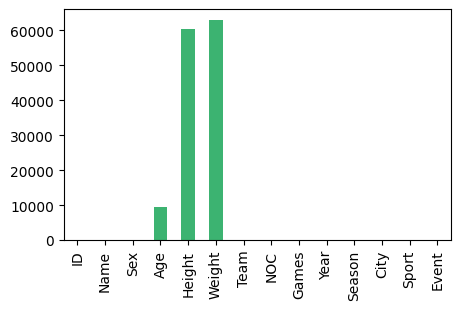

In [4]:
nulls = df.isnull().sum().drop("Medal")

plt.figure(figsize=(5,3))
nulls.plot(kind="bar", color="mediumseagreen")
plt.show()

In [ ]:
int(df.shape[0] - nulls.max())

(270097, 15)